## Load and Explore the Dataset

In [1]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
print(f'wine.data.shape    = {wine.data.shape}')
print(f'wine.target.shape  = {wine.target.shape}')
print(f'wine.target_names  = {wine.target_names}')
print(f'wine.feature_names = {wine.feature_names}')

wine.data.shape    = (178, 13)
wine.target.shape  = (178,)
wine.target_names  = ['class_0' 'class_1' 'class_2']
wine.feature_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## Create a Pandas Dataframe 

In [3]:
import pandas as pd

pd.set_option('max_columns', 5)
pd.set_option('display.width', None)

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['Class'] = [wine.target_names[i] for i in wine.target]

wine_df

,alcohol,malic_acid,...,proline,Class
0,14.23,1.71,...,1065.0,class_0
1,13.20,1.78,...,1050.0,class_0
2,13.16,2.36,...,1185.0,class_0
3,14.37,1.95,...,1480.0,class_0
4,13.24,2.59,...,735.0,class_0
...,...,...,...,...,...
173,13.71,5.65,...,740.0,class_2
174,13.40,3.91,...,750.0,class_2
175,13.27,4.28,...,835.0,class_2
176,13.17,2.59,...,840.0,class_2


In [4]:
pd.set_option('precision', 2)
wine_df.describe()

,alcohol,malic_acid,...,od280/od315_of_diluted_wines,proline
count,178.00,178.00,...,178.00,178.00
mean,13.00,2.34,...,2.61,746.89
std,0.81,1.12,...,0.71,314.91
min,11.03,0.74,...,1.27,278.00
25%,12.36,1.60,...,1.94,500.50
50%,13.05,1.87,...,2.78,673.50
75%,13.68,3.08,...,3.17,985.00
max,14.83,5.80,...,4.00,1680.00


In [5]:
wine_df['Class'].describe()

count         178
unique          3
top       class_1
freq           71
Name: Class, dtype: object

## Visualize the Dataset

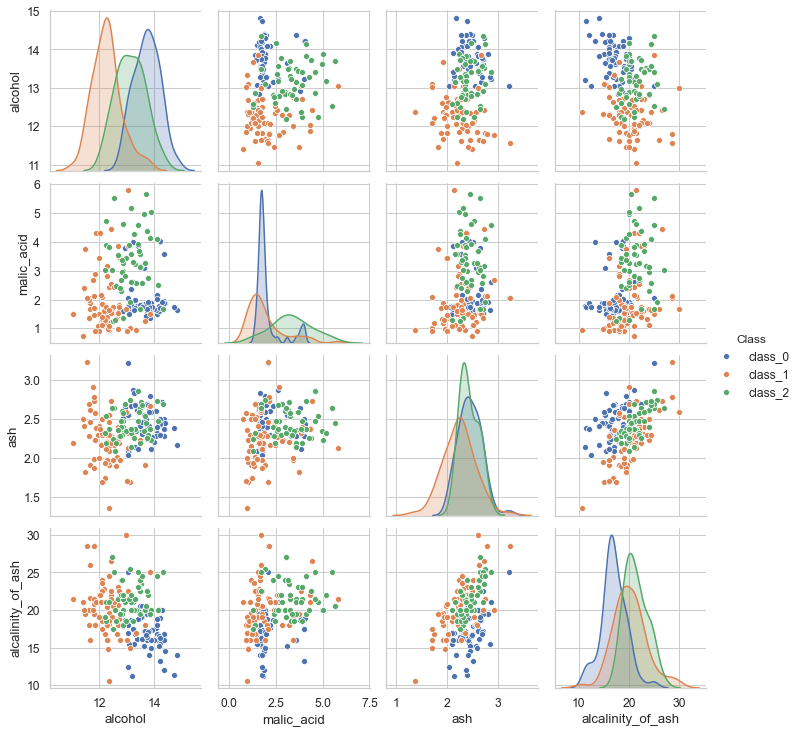

In [7]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=wine_df, vars=wine_df.columns[0:4], hue='Class')

## Create a k-means Estimator and Fit the Model 

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=11)  # find three clusters
kmeans.fit(wine.data)

KMeans(n_clusters=3, random_state=11)

## Compare the k-means labels to the Wine Dataset's target values 

In [9]:
print(kmeans.labels_[0:50])
print(kmeans.labels_[50:100])
print(kmeans.labels_[100:150])

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 2 0 0 0 0 0 2 2 0 2 0]
[2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2
 0 0 0 2 2 0 0 2 2 0 2 2 0]


## Dimensionally reduction with Principal Component Analysis (PCA) 

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(wine.data)

PCA(n_components=2, random_state=11)

In [11]:
reduced_wine = pca.transform(wine.data)
reduced_wine.shape

(178, 2)

## Visualize the Reduced Data  


In [12]:
reduced_wine_df = pd.DataFrame(reduced_wine, 
                               columns=['Component 1', 'Component 2'])
reduced_wine_df['Class'] = wine_df.Class

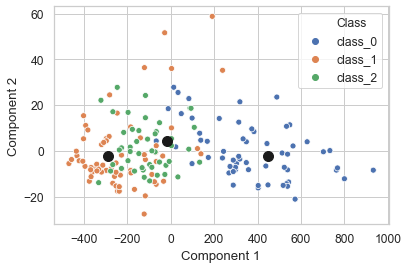

In [13]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=reduced_wine_df, hue='Class', legend='brief', 
                       x='Component 1', y='Component 2') 

wine_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(wine_centers[:,0], wine_centers[:,1], s=100, c='k')

## Create a TSNE Estimator to reduce the data to two dimensions


In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=11)
reduced_wine = tsne.fit_transform(wine.data)

print(f'Reduced data shape: reduced_digits.shape = {reduced_wine.shape}')

Reduced data shape: reduced_digits.shape = (178, 2)


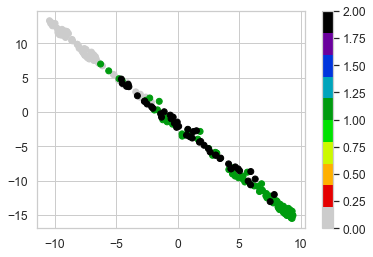

In [15]:
dots = plt.scatter(reduced_wine[:, 0], reduced_wine[:, 1], c=wine.target, 
                   cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

colorbar = plt.colorbar(dots)

<h2>Now that the Data has been labelled we will perform Supervised ML Analysis using k-NearestNeighbors Algorithm</h2>

<h2>Explore the data and target values</h2>

In [16]:
print(f'wine_df.data.shape    = {wine.data.shape}')
print(f'wine_df.target.shape  = {wine.target.shape}')

wine_df.data.shape    = (178, 13)
wine_df.target.shape  = (178,)


In [17]:
print()
print('One-dimensional array representation for Scikit-Learn:')
print(f'digits.data[13] = ')
print(wine.data[13])


One-dimensional array representation for Scikit-Learn:
digits.data[13] = 
[1.475e+01 1.730e+00 2.390e+00 1.140e+01 9.100e+01 3.100e+00 3.690e+00
 4.300e-01 2.810e+00 5.400e+00 1.250e+00 2.730e+00 1.150e+03]


In [18]:
print()
print('Some target values:')
print(f'digits.target[::100] = {wine.target[::100]}')


Some target values:
digits.target[::100] = [0 1]


<h2>Split the data for training and testing</h2>

In [19]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     wine.data, wine.target, random_state=11)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (133, 13)
X_test.shape  = (45, 13)

y_train.shape = (133,)
y_test.shape  = (45,)


<h2>Create and train the k-nearest neighbors model</h2>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

<h2>Test the model by predicting the values of wine </h2>

In [21]:
predicted = knn.predict(X=X_test)
expected = y_test

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}')

First twenty predictions:
predicted[:20] = [1 0 1 0 0 0 1 1 2 0 0 1 0 0 2 2 0 1 1 1]
 expected[:20] = [2 0 1 0 0 0 1 1 1 0 2 1 0 0 1 1 0 2 1 1]


In [22]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(1, 2), (2, 1), (0, 2), (2, 1), (2, 1), (1, 2), (1, 2), (0, 1), (2, 1), (0, 2), (0, 1), (2, 1)]


<h2>Model prediction accuracy</h2>

In [23]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 73.33%


<h2>Confusion matrix </h2>

In [24]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[18  0  0]
 [ 2 11  5]
 [ 2  3  4]]


<h2>Heat Map visualizing the confusion matrix</h2>

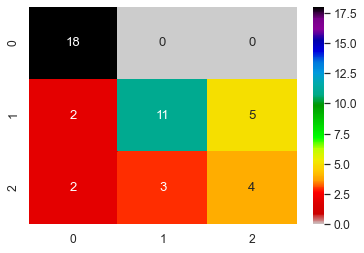

In [25]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

<h2>Classification report </h2>

In [26]:

from sklearn.metrics import classification_report

names = [str(digit) for digit in wine.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

     class_0       0.82      1.00      0.90        18
     class_1       0.79      0.61      0.69        18
     class_2       0.44      0.44      0.44         9

    accuracy                           0.73        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.73      0.73      0.72        45



<h3><ol>Analysis Report:
<li> We have used the Wine prediction dataset to analyse and transfer our Unsupervised unlabeled data to Supervised ML with labeled data. </li>
<li>We have used K-Means Clustering for Unsupervised ML and KNN for Supervised ML .</li>
<li>After we have transformed the data from unsupervised to supervised,we have split the data for training and testing .</li>
<li> We have trained the data and then tested out the data to see the prediction accuracy of the model and it turned out to be 74% accurate.</li>
<li>We have calculated the wrong predicted values and there are about 12 values that were predicted wrong.</li>
<li> We have also calculated the confusion matrix and laid out the heat map for the same. </li>
<li>Precision,Recall,f-score and support have been calculated as well.</li>
</ol>
</h3>